![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


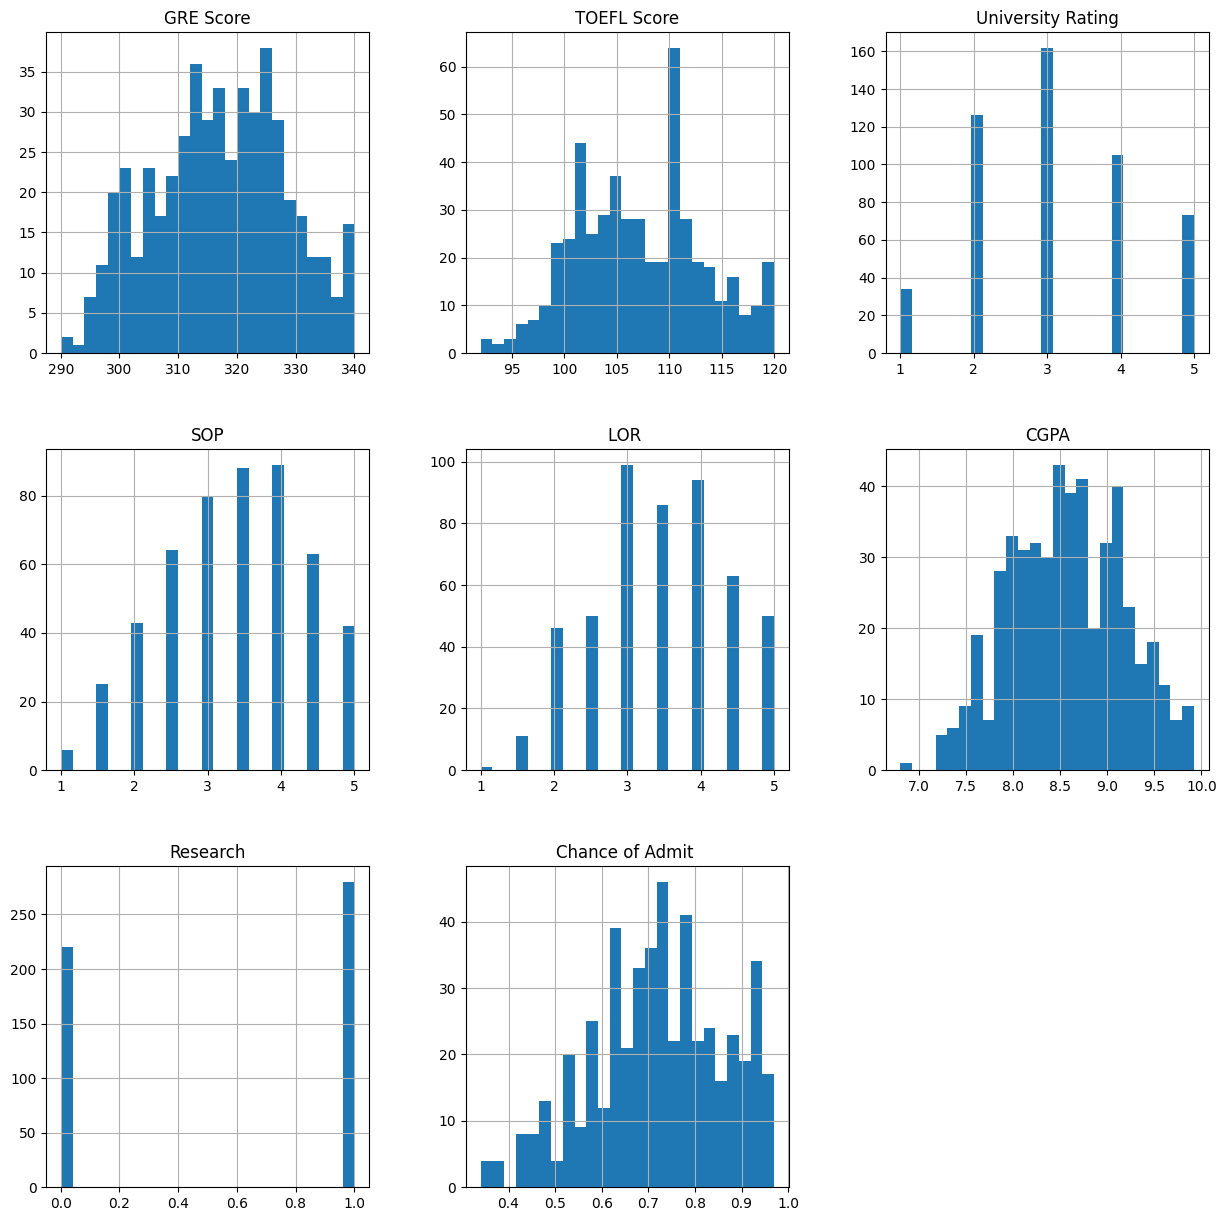

In [8]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [9]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = pd.DataFrame(np.array(data[data.columns[-1]]), columns=['labels'])

In [10]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [11]:
scaler = StandardScaler()
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_test = np.array(X_test)
Y_test = np.array(yTest)

In [12]:
output_var = Y_train.shape[1]
print(output_var, ' output variables')

1  output variables


In [13]:
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [14]:
K.clear_session()
model_p1 = Sequential()
model_p1.add(Dense(output_var, input_shape=(dims,)))
print(model_p1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


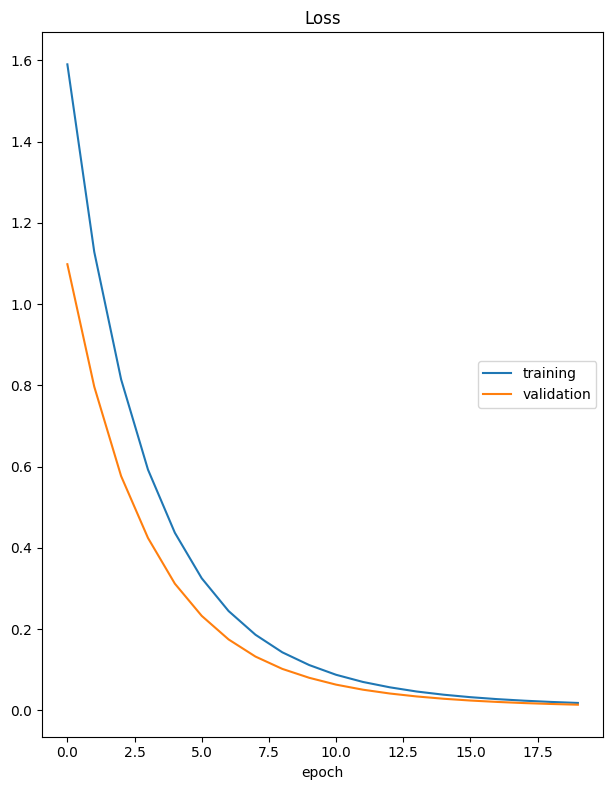

Loss
	training         	 (min:    0.018, max:    1.590, cur:    0.018)
	validation       	 (min:    0.014, max:    1.098, cur:    0.014)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - val_loss: 0.0141


In [15]:
model_p1.compile(optimizer='sgd', loss='mean_squared_error')
model_p1.fit(X_train, Y_train, 
          verbose=1, 
          epochs=20, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [16]:
y_pred_p1 = model_p1.predict(X_test)
mae_p1 = mean_absolute_error(Y_test, y_pred_p1)
mse_p1 = mean_squared_error(Y_test, y_pred_p1)
(mae_p1,mse_p1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(0.09558630476792652, 0.014061455611537751)

* Previo a la creación de la red neuronal, se estandarizan las variables X de la muestra de entrenamiento y de test, para que todas conserven una escala común que permita mejorar el rendimiento del modelo sin distorsionar información.
* Se define un modelo secuencial y se le añade una capa densa, que ayuda a que las neuronas entre capas estén conectadas. Para esta parte se define solamente una capa, añadiendo las variables X, como variables de entrada.
* Se compila el modelo haciendo uso de:
    * Optimizador = descenso de gradiente estocástico: se define este optimizador, ya que es simple y eficiente, teniendo el modelo poca complejidad, puede funcionar bien. Debido a su aleatoriedad y frecuencia en la asignación de pesos, evita el sobreajuste en los datos, ajustando los parámetros de tal forma que la función de perdida se minimice o se estabilice.
    * Función de perdida = error cuadrático medio: al penalizar las diferencias significativas entre las predicciones y los valores reales, ayudando a mejorar las predicciones del modelo.
* Se definen 20 épocas, para que haga 20 pasadas iteraciones sobre el conjunto de entrenamiento, ajustando en cada iteración sus pesos en función de minimizar el error en las predicciones.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [17]:
K.clear_session()
model_p2 = Sequential()
model_p2.add(Dense(256, input_shape=(dims,), activation='relu'))
model_p2.add(Dense(output_var, activation='relu'))
model_p2.compile(optimizer='sgd', loss='mean_squared_error')
print(model_p2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,305 (9.00 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

None


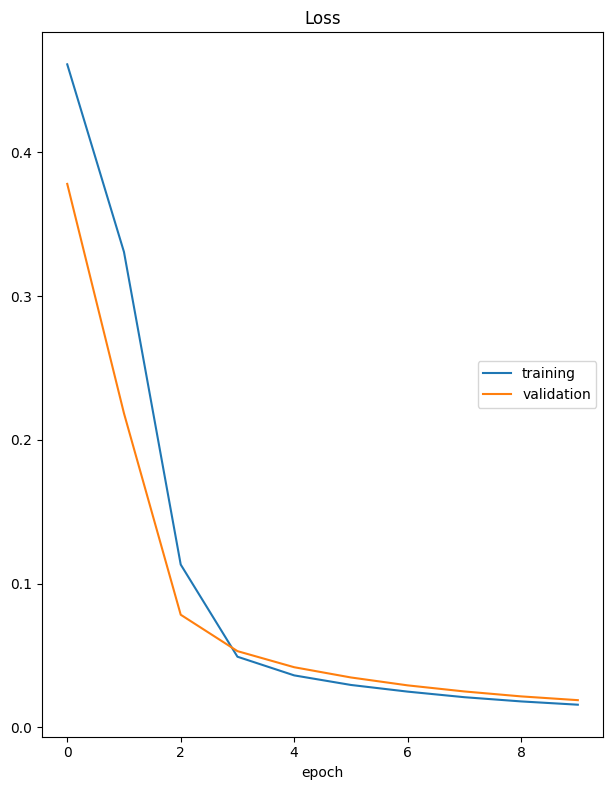

Loss
	training         	 (min:    0.016, max:    0.461, cur:    0.016)
	validation       	 (min:    0.019, max:    0.378, cur:    0.019)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0171 - val_loss: 0.0190


In [18]:
model_p2.fit(X_train, Y_train, 
          verbose=1, 
          epochs=10, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [19]:
y_pred_p2 = model_p2.predict(X_test)
mae_p2 = mean_absolute_error(Y_test, y_pred_p2)
mse_p2 = mean_squared_error(Y_test, y_pred_p2)
(mae_p2,mse_p2)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(0.11422634859879811, 0.019004853599653225)

* Se crea una red neuronal con dos capas en donde a cada una se define como:
    1. Se define una capa densa con 256 neuronas, con las variables X como datos de entrada a cada neurona y la función de activación ReLU (unidad lineal rectificada). Esta será una capa oculta en donde cada neurona cuenta con un peso para cada variable, por lo que para cada observación se multiplica cada valor de la variable por su respectivo peso, luego hará una suma ponderada pasa entonces a la función de activación no lineal, permitiendo que el modelo capte relaciones complejas en los datos, y está será la información de salida para la siguiente capa.
    A contar con más neuronas, el modelo tendrá una mejor representación, dándole la oportunidad de aprender relaciones más complejas que proporcionen mejores resultados. 
    2. Se define la capa de salida que contará  con el mismo número de variables X y como función de activación ReLU.
* Se escoge la función de activación ReLU, ya que evita que las neuronas detengan su aprendizaje por llegar a los valores límites e introduce esparcidas, ayudando a evitar el sobreajuste al inactivar algunas neuronas.
* Se utilizan la misma función de perdida y optimizador que en el punto anterior. 
* Se definen 10 épocas.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [20]:
# Celda 3
K.clear_session()
model_p3 = Sequential()
model_p3.add(Dense(256, input_shape=(dims,), activation='relu'))
model_p3.add(Dropout(0.5))
model_p3.add(Dense(256, activation='relu'))
model_p3.add(Dropout(0.5))
model_p3.add(Dense(output_var))
model_p3.compile(optimizer='sgd', loss='mean_squared_error')
print(model_p3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,097 (266.00 KB)

 Trainable params: 68,097 (266.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
best_model = ModelCheckpoint('best_model.keras', verbose=0, save_best_only=True)

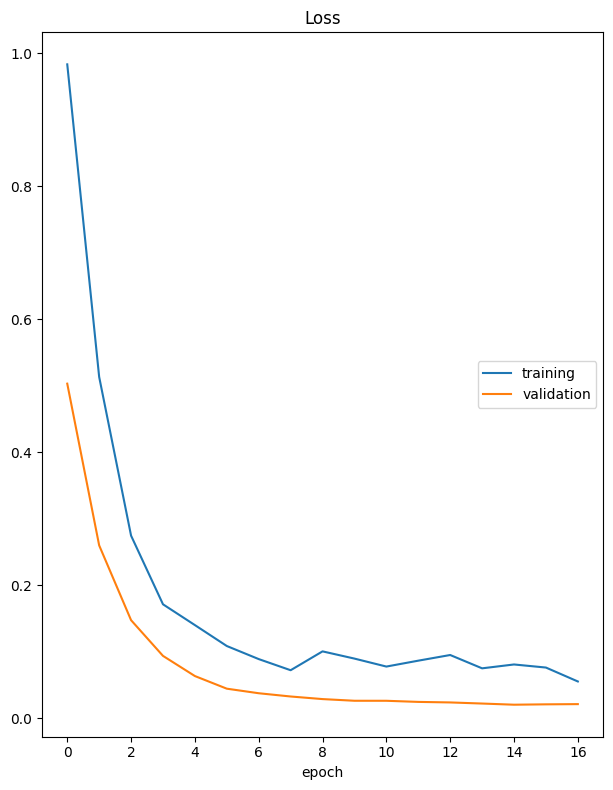

Loss
	training         	 (min:    0.056, max:    0.983, cur:    0.056)
	validation       	 (min:    0.021, max:    0.503, cur:    0.021)
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0552 - val_loss: 0.0215
Epoch 17: early stopping


In [23]:
model_p3.fit(X_train, Y_train, 
          verbose=1, 
          epochs=100, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop,PlotLossesKeras()])

In [24]:
y_pred_p3 = model_p3.predict(X_test)
mae_p3 = mean_absolute_error(Y_test, y_pred_p3)
mse_p3 = mean_squared_error(Y_test, y_pred_p3)
(mae_p3,mse_p3)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002A4720156C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(0.12509156166712443, 0.021472843576931896)

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

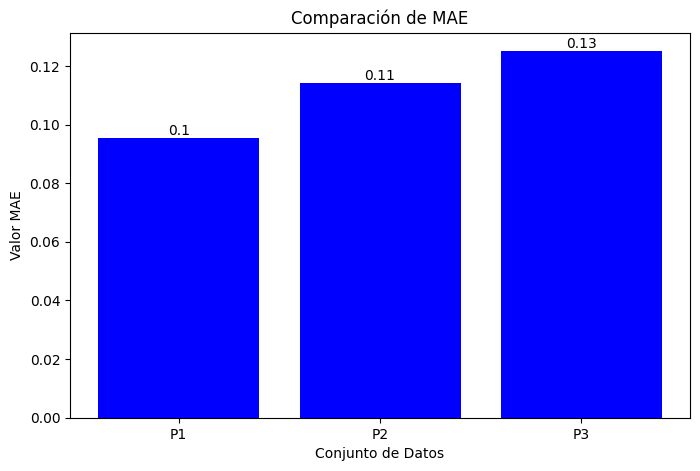

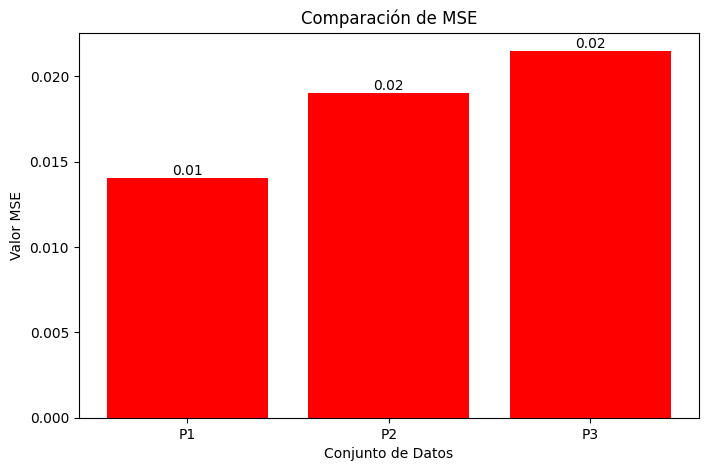

In [28]:
import matplotlib.pyplot as plt

# Datos
mae_values = [mae_p1, mae_p2, mae_p3]
mse_values = [mse_p1, mse_p2, mse_p3]
labels = ['P1', 'P2', 'P3']

# Gráfico 1: MAE vs. Etiquetas
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mae_values, color='blue')

# Agregar etiquetas de datos
for bar, mae in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mae, 2), 
             ha='center', va='bottom')

plt.xlabel('Conjunto de Datos')
plt.ylabel('Valor MAE')
plt.title('Comparación de MAE')
plt.show()

# Gráfico 2: MSE vs. Etiquetas
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, mse_values, color='red')

# Agregar etiquetas de datos
for bar, mse in zip(bars, mse_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(mse, 2), 
             ha='center', va='bottom')

plt.xlabel('Conjunto de Datos')
plt.ylabel('Valor MSE')
plt.title('Comparación de MSE')
plt.show()

